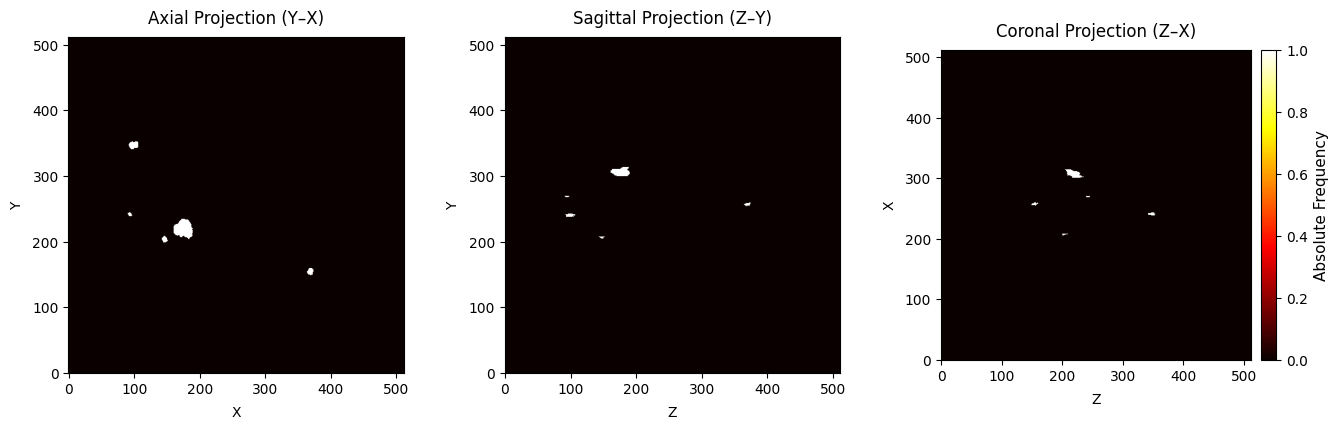

✅ Clean heatmap projection image saved to: /content/frequency_heatmap_3view_clean.png


In [ ]:
   import SimpleITK as sitk
except ImportError:
    !pip install SimpleITK
    import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

freq_map_path = "/content/frequency_absolute_map.nii"

freq_img = sitk.ReadImage(freq_map_path)
freq_arr = sitk.GetArrayFromImage(freq_img).astype(np.float32)

freq_norm = freq_arr / np.max(freq_arr) if np.max(freq_arr) > 0 else freq_arr

proj_axial = np.max(freq_norm, axis=0)
proj_sagittal = np.max(freq_norm, axis=1)
proj_coronal = np.max(freq_norm, axis=2)

def pad_to_shape(arr, target_shape):
    pad_y = target_shape[0] - arr.shape[0]
    pad_x = target_shape[1] - arr.shape[1]
    pad_y1, pad_y2 = pad_y // 2, pad_y - pad_y // 2
    pad_x1, pad_x2 = pad_x // 2, pad_x - pad_x // 2
    return np.pad(arr, ((pad_y1, pad_y2), (pad_x1, pad_x2)), mode='constant')

max_y = max(proj_axial.shape[0], proj_sagittal.shape[0], proj_coronal.shape[0])
max_x = max(proj_axial.shape[1], proj_sagittal.shape[1], proj_coronal.shape[1])
target_shape = (max_y, max_x)

proj_axial = pad_to_shape(proj_axial, target_shape)
proj_sagittal = pad_to_shape(proj_sagittal, target_shape)
proj_coronal = pad_to_shape(proj_coronal, target_shape)

fig, axs = plt.subplots(1, 3, figsize=(16, 5))
cm = 'hot'

titles = ['Axial Projection (Y–X)', 'Sagittal Projection (Z–Y)', 'Coronal Projection (Z–X)']
xlabels = ['X', 'Z', 'Z']
ylabels = ['Y', 'Y', 'X']

for ax, data, title, xlabel, ylabel in zip(axs, [proj_axial, proj_sagittal, proj_coronal], titles, xlabels, ylabels):
    im = ax.imshow(data, cmap=cm, origin='lower', vmin=0, vmax=1, aspect='equal')
    ax.set_title(title, fontsize=12, pad=10)
    ax.set_xlabel(xlabel, labelpad=6)
    ax.set_ylabel(ylabel, labelpad=6)

divider = make_axes_locatable(axs[-1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Absolute Frequency', fontsize=11)

plt.subplots_adjust(wspace=0.3, right=0.88)
plt.show()

out_path = "/content/frequency_heatmap_3view_clean.png"
fig.savefig(out_path, dpi=300, bbox_inches='tight')
print(f"✅ Clean heatmap projection image saved to: {out_path}")
